In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Get the info of 'nba_elo_csv'

In [2]:
nba = pd.read_csv("nba_elo.csv")

In [3]:
nba.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,47.0
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,51.0
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,50.0


# Part 1: Data exploration

In [5]:
nba.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2'],
      dtype='object')

In [6]:
nba.isnull().sum()

date                  0
season                0
neutral               0
playoff           65274
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post          1025
elo2_post          1025
carm-elo1_pre     63157
carm-elo2_pre     63157
carm-elo_prob1    63157
carm-elo_prob2    63157
carm-elo1_post    64182
carm-elo2_post    64182
raptor1_pre       67094
raptor2_pre       67094
raptor_prob1      67094
raptor_prob2      67094
score1             1025
score2             1025
dtype: int64

# Data cleaning

In [5]:
nba = nba.drop(['playoff', 'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo1_post', 'carm-elo2_post',
        'carm-elo_prob1', 'carm-elo_prob2','raptor1_pre', 'raptor2_pre','raptor_prob1', 'raptor_prob2'],axis=1)

In [6]:
nba.head(5)

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1946-11-01,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66.0,68.0
1,1946-11-02,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63.0,47.0
2,1946-11-02,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59.0,53.0
3,1946-11-02,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56.0,51.0
4,1946-11-02,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33.0,50.0


In [8]:
nba.isnull().sum()

date                  0
season                0
neutral               0
playoff           65274
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post          1025
elo2_post          1025
carm-elo1_pre     63157
carm-elo2_pre     63157
carm-elo_prob1    63157
carm-elo_prob2    63157
carm-elo1_post    64182
carm-elo2_post    64182
raptor1_pre       67094
raptor2_pre       67094
raptor_prob1      67094
raptor_prob2      67094
score1             1025
score2             1025
dtype: int64

In [9]:
nba.dropna(axis=0, how='any', inplace=True)

In [10]:
nba.isnull().sum()

date              0
season            0
neutral           0
playoff           0
team1             0
team2             0
elo1_pre          0
elo2_pre          0
elo_prob1         0
elo_prob2         0
elo1_post         0
elo2_post         0
carm-elo1_pre     0
carm-elo2_pre     0
carm-elo_prob1    0
carm-elo_prob2    0
carm-elo1_post    0
carm-elo2_post    0
raptor1_pre       0
raptor2_pre       0
raptor_prob1      0
raptor_prob2      0
score1            0
score2            0
dtype: int64

Till tthis point, all the null data has been removed.

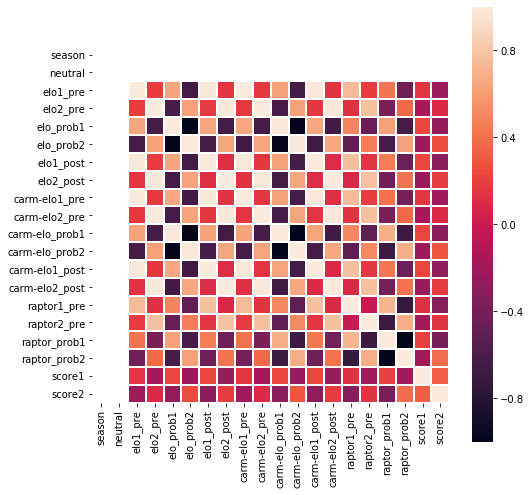

In [11]:
### calculate the correlation

fig, ax = plt.subplots(figsize=(8,8)) 
cor = nba.corr()
sns.heatmap(cor, square = True,linewidths= 1)

In [12]:
nba.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2
count,82.0,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2019.0,0.0,1635.216496,1632.575406,0.637553,0.362447,1634.087825,1633.704077,1638.271295,1635.465158,0.637652,0.362348,1637.155563,1636.580891,1685.549470,1674.844315,0.633832,0.366168,109.609756,105.792683
std,0.0,0.0,61.600909,62.390781,0.101814,0.101814,64.502567,63.363128,64.303987,64.877185,0.108147,0.108147,66.923084,65.814124,103.779631,107.499708,0.182597,0.182597,11.970907,12.605836
min,2019.0,0.0,1477.485696,1491.764559,0.345632,0.164490,1466.013390,1487.216406,1479.944459,1494.039355,0.341724,0.163056,1468.626907,1489.536170,1421.064704,1425.473884,0.202079,0.064898,84.000000,74.000000
25%,2019.0,0.0,1591.912425,1589.162727,0.557002,0.286182,1592.801249,1590.261469,1590.298639,1585.500266,0.558736,0.278880,1588.117992,1586.884631,1607.314254,1604.981472,0.499895,0.243276,101.000000,98.000000
50%,2019.0,0.0,1648.963814,1642.224082,0.658105,0.341895,1640.545310,1652.150176,1657.720017,1650.477603,0.664801,0.335199,1650.032807,1659.826440,1698.311991,1677.111993,0.658247,0.341753,110.000000,104.500000
75%,2019.0,0.0,1681.611059,1678.480939,0.713818,0.442998,1680.348398,1684.029590,1687.906396,1682.448150,0.721120,0.441264,1686.814233,1687.837653,1774.400095,1770.083526,0.756724,0.500105,118.000000,112.750000
max,2019.0,0.0,1727.522337,1735.601010,0.835510,0.654368,1730.225258,1735.601010,1731.123131,1742.646981,0.836944,0.658276,1737.061631,1742.646981,1850.636656,1842.700562,0.935102,0.797921,145.000000,137.000000


In [13]:
#Total number of games played by each team
def num_of_games(team):
    return len(nba.loc[nba["team1"] == team])+len(nba.loc[nba["team2"] == team])
#Getting the list of all the teams present(unique)

teams = set(nba["team1"]).union(set(nba["team2"]))
len(teams)

16

In [14]:
# The table lists the team and the total games played 
x = list(teams)
y = [num_of_games(i) for i in x]
total_games = pd.DataFrame([x,y])
total_games

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,GSW,BRK,DEN,OKC,PHI,TOR,IND,DET,LAC,BOS,HOU,POR,SAS,MIL,ORL,UTA
1,22,5,14,5,12,24,4,4,6,9,11,16,7,15,5,5


# Getting winning and losing teams scores from the dataframe

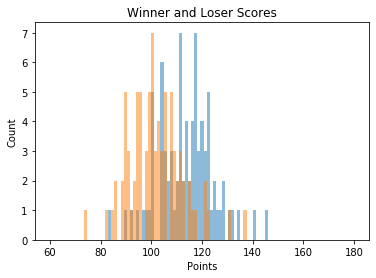

In [15]:

scores = pd.DataFrame([nba["score1"],nba["score2"]])
winner_scores = scores.max(0)
looser_scores = scores.min(0)
#Plotting winning vs losing scores
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Loser Scores")
plt.xlabel("Points")
plt.ylabel("Count")
plt.hist(winner_scores,bins, alpha=0.5)
plt.hist(looser_scores,bins, alpha=0.5)
plt.show()

# Find home teams (team1) wins and losses 

In [16]:

y = pd.DataFrame(nba["score1"]>nba["score2"],index=np.arange(len(nba["score1"])),columns=["team1_wins"])
X = nba.join(y)
X.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,team1_wins
68324,2019-04-13,2019,0,q,PHI,BRK,1574.572545,1517.072749,0.712312,0.287688,...,0.295362,1559.759044,1536.210108,1659.205790,1476.298443,0.833021,0.166979,102.0,111.0,NaN
68325,2019-04-13,2019,0,q,TOR,ORL,1644.110577,1592.652024,0.705134,0.294866,...,0.277377,1645.627714,1603.906180,1778.344437,1538.647611,0.879727,0.120273,101.0,104.0,NaN
68326,2019-04-13,2019,0,q,GSW,LAC,1633.965443,1542.825160,0.750315,0.249685,...,0.236667,1651.956606,1536.225974,1844.140057,1496.018393,0.929395,0.070605,121.0,104.0,NaN
68327,2019-04-13,2019,0,q,DEN,SAS,1595.375917,1578.035069,0.662727,0.337273,...,0.299940,1572.357450,1586.324046,1676.625588,1544.473206,0.826371,0.173629,96.0,101.0,NaN
68328,2019-04-14,2019,0,q,BOS,IND,1586.066516,1537.953947,0.701113,0.298887,...,0.286161,1602.436602,1531.418513,1640.479409,1545.290953,0.752858,0.247142,84.0,74.0,NaN


# Part 2: Regression

# Adding some features to the data

In [17]:

X = X.drop(['neutral'],axis=1)
X = X.drop(['date'],axis=1)
X = X.drop(['season'],axis=1)

In [18]:

#Difference between post match ratings of the two teams
x0 = pd.DataFrame(X['elo2_post']-X['elo1_post'])
x0 = x0.rename(columns={0:'post_diff'})

#Product of probabilities
x1 = pd.DataFrame(X['elo_prob1']*X['elo_prob2'])
x1 = x1.rename(columns={0:'prod_probs'})

#Final dataframe after concatenating new features 
nba_new = pd.concat([X,x0,x1],axis=1)

In [20]:

per1 = []
per2 = []
for i,x in nba_new.iterrows():
    per1.append(float(x['score1'])/(x['score1'] + x['score2']))
    per2.append(float(x['score2'])/(x['score1'] + x['score2']))
    

nba_new['per1'] = pd.DataFrame(per1, index=nba_new.index)
nba_new['per2'] = pd.DataFrame(per2, index=nba_new.index)

In [21]:
nba_new.head()

,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,...,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,team1_wins,post_diff,prod_probs,per1,per2
68324,q,PHI,BRK,1574.572545,1517.072749,0.712312,0.287688,1558.706351,1532.938943,1575.362109,...,1476.298443,0.833021,0.166979,102.0,111.0,NaN,-25.767408,0.204923,0.478873,0.521127
68325,q,TOR,ORL,1644.110577,1592.652024,0.705134,0.294866,1635.139289,1601.623312,1654.947734,...,1538.647611,0.879727,0.120273,101.0,104.0,NaN,-33.515977,0.207920,0.492683,0.507317
68326,q,GSW,LAC,1633.965443,1542.825160,0.750315,0.249685,1640.309824,1536.480779,1645.993848,...,1496.018393,0.929395,0.070605,121.0,104.0,NaN,-103.829046,0.187343,0.537778,0.462222
68327,q,DEN,SAS,1595.375917,1578.035069,0.662727,0.337273,1585.081878,1588.329108,1583.526209,...,1544.473206,0.826371,0.173629,96.0,101.0,NaN,3.247231,0.223520,0.487310,0.512690
68328,q,BOS,IND,1586.066516,1537.953947,0.701113,0.298887,1591.612747,1532.407715,1597.166790,...,1545.290953,0.752858,0.247142,84.0,74.0,NaN,-59.205032,0.209553,0.531646,0.468354


# Generate training and testing data

In [41]:
X_train=nba_new.sample(frac=0.7,random_state=0)
X_test=nba_new.drop(X_train.index)

#Selecting only numeric features from the dataframe for our model
fit_features = ['elo1_pre','elo1_post','elo_prob1','post_diff','prod_probs','per1','score2']
x_train = X_train[fit_features]
y_train = X_train['score1']

# Model 1: Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

clfr = RandomForestClassifier()

clfr.fit(x_train, y_train)

/Users/xurui1993/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
x_test = X_test[fit_features]
y_test = X_test['score1']
print ('accuracy of team 1')
print(accuracy_score(Y_te, clfr.predict(X_te)))

accuracy of team 1
0.12


In [45]:
Y = clfr.predict(x_test)
# Calculating mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, Y))

# Calculating variance score
print('Variance score: %.2f' % r2_score(y_test, Y))

Mean squared error: 116.76
Variance score: 0.21


# Model 2: Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

reg1.fit(x_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg1.score(x_train,y_train)

0.9924108635783782

In [48]:
reg1.score(X_te,Y_te)

0.988940865613648

In [49]:
Y = reg1.predict(X_te)
# Calculating mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_te, Y))

# Calculating variance score
print('Variance score: %.2f' % r2_score(Y_te, Y))

Mean squared error: 1.64
Variance score: 0.99


The second linear regression model  substantially enhances the performance.